In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train, test

(          id  Time_spent_Alone Stage_fear  Social_event_attendance  \
 0          0               0.0         No                      6.0   
 1          1               1.0         No                      7.0   
 2          2               6.0        Yes                      1.0   
 3          3               3.0         No                      7.0   
 4          4               1.0         No                      4.0   
 ...      ...               ...        ...                      ...   
 18519  18519               3.0         No                      7.0   
 18520  18520               1.0        NaN                      6.0   
 18521  18521               7.0        Yes                      1.0   
 18522  18522               NaN        Yes                      1.0   
 18523  18523               1.0         No                      8.0   
 
        Going_outside Drained_after_socializing  Friends_circle_size  \
 0                4.0                        No                 15.0   
 1

In [3]:
train.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [4]:
test.isnull().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

In [5]:
train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
test.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,6175.000000,5750.000000,5778.000000,5709.000000,5825.000000,5767.000000
mean,21611.000000,3.116870,5.287989,4.037835,8.008412,5.028958
std,1782.713288,2.985658,2.758052,2.045207,4.192701,2.867285
min,18524.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20067.500000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,21611.000000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,23154.500000,4.000000,8.000000,6.000000,12.000000,7.000000
max,24698.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
train['Stage_fear'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
def pre_process(df):
    df2 = df.copy()
    if "id" in df2.columns:
        df2.drop(["id"], axis=1, inplace=True)
    imp = SimpleImputer(strategy='mean')
    df2[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size', 'Post_frequency']] = imp.fit_transform(df2[['Time_spent_Alone', 'Social_event_attendance', 'Going_outside','Friends_circle_size', 'Post_frequency']])
    
    imp2 = SimpleImputer(strategy='most_frequent')
    df2[['Stage_fear', 'Drained_after_socializing']] = imp2.fit_transform(df2[['Stage_fear', 'Drained_after_socializing']])
    
    one_hot = OneHotEncoder(sparse_output=False)
    df3 = one_hot.fit_transform(df2[['Stage_fear', 'Drained_after_socializing']])        
    label = one_hot.get_feature_names_out(['Stage_fear', 'Drained_after_socializing'])
    df4 = pd.DataFrame(df3, columns=label)
    
    df5 = pd.concat([df2, df4], axis=1)
    df5.drop("Stage_fear", axis = 1, inplace=True)
    df5.drop("Drained_after_socializing", axis = 1, inplace=True)
    return df5


In [9]:
data = pre_process(train)
data

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.000000,6.0,4.0,15.0,5.000000,Extrovert,1.0,0.0,1.0,0.0
1,1.000000,7.0,3.0,10.0,8.000000,Extrovert,1.0,0.0,1.0,0.0
2,6.000000,1.0,0.0,3.0,0.000000,Introvert,0.0,1.0,1.0,0.0
3,3.000000,7.0,3.0,11.0,5.000000,Extrovert,1.0,0.0,1.0,0.0
4,1.000000,4.0,4.0,13.0,4.982097,Extrovert,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18519,3.000000,7.0,3.0,9.0,7.000000,Extrovert,1.0,0.0,1.0,0.0
18520,1.000000,6.0,7.0,6.0,5.000000,Extrovert,1.0,0.0,1.0,0.0
18521,7.000000,1.0,1.0,1.0,4.982097,Introvert,0.0,1.0,0.0,1.0
18522,3.137764,1.0,0.0,5.0,2.000000,Introvert,0.0,1.0,0.0,1.0


In [10]:
data.isnull().sum()

Time_spent_Alone                 0
Social_event_attendance          0
Going_outside                    0
Friends_circle_size              0
Post_frequency                   0
Personality                      0
Stage_fear_No                    0
Stage_fear_Yes                   0
Drained_after_socializing_No     0
Drained_after_socializing_Yes    0
dtype: int64

In [35]:
ciao = pd.read_csv("train.csv")
ciao

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [ ]:
lab = LabelEncoder()
data['Personality'] = lab.fit_transform(data['Personality'])  # 0 per extro, 1 per intro
data

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,0.000000,6.0,4.0,15.0,5.000000,0,1.0,0.0,1.0,0.0
1,1.000000,7.0,3.0,10.0,8.000000,0,1.0,0.0,1.0,0.0
2,6.000000,1.0,0.0,3.0,0.000000,1,0.0,1.0,1.0,0.0
3,3.000000,7.0,3.0,11.0,5.000000,0,1.0,0.0,1.0,0.0
4,1.000000,4.0,4.0,13.0,4.982097,0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18519,3.000000,7.0,3.0,9.0,7.000000,0,1.0,0.0,1.0,0.0
18520,1.000000,6.0,7.0,6.0,5.000000,0,1.0,0.0,1.0,0.0
18521,7.000000,1.0,1.0,1.0,4.982097,1,0.0,1.0,0.0,1.0
18522,3.137764,1.0,0.0,5.0,2.000000,1,0.0,1.0,0.0,1.0


In [12]:
X = data.drop('Personality', axis = 1)
y = data['Personality']
X, y

(       Time_spent_Alone  Social_event_attendance  Going_outside  \
 0              0.000000                      6.0            4.0   
 1              1.000000                      7.0            3.0   
 2              6.000000                      1.0            0.0   
 3              3.000000                      7.0            3.0   
 4              1.000000                      4.0            4.0   
 ...                 ...                      ...            ...   
 18519          3.000000                      7.0            3.0   
 18520          1.000000                      6.0            7.0   
 18521          7.000000                      1.0            1.0   
 18522          3.137764                      1.0            0.0   
 18523          1.000000                      8.0            6.0   
 
        Friends_circle_size  Post_frequency  Stage_fear_No  Stage_fear_Yes  \
 0                     15.0        5.000000            1.0             0.0   
 1                     10.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

--- Logistic Regression ---
Accuracy: 0.9684
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

--- SVM ---
Accuracy: 0.9690
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

--- KNN ---
Accuracy: 0.9679
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.94      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96  

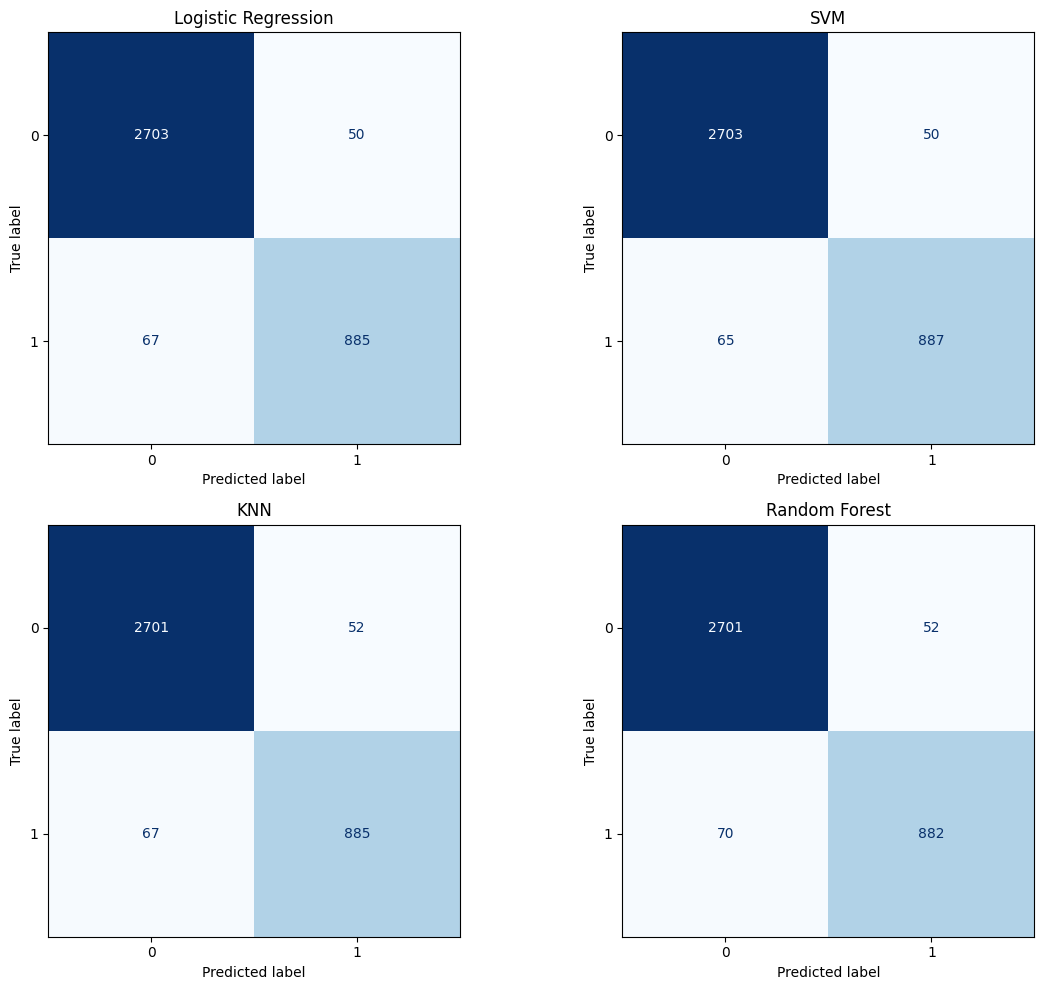

In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid
axes = axes.flatten()  # flatten for easy indexing

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], colorbar=False, cmap='Blues')
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()

--- Logistic Regression ---
Accuracy: 0.9684
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

--- SVM ---
Accuracy: 0.9687
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

--- KNN ---
Accuracy: 0.9690
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96  

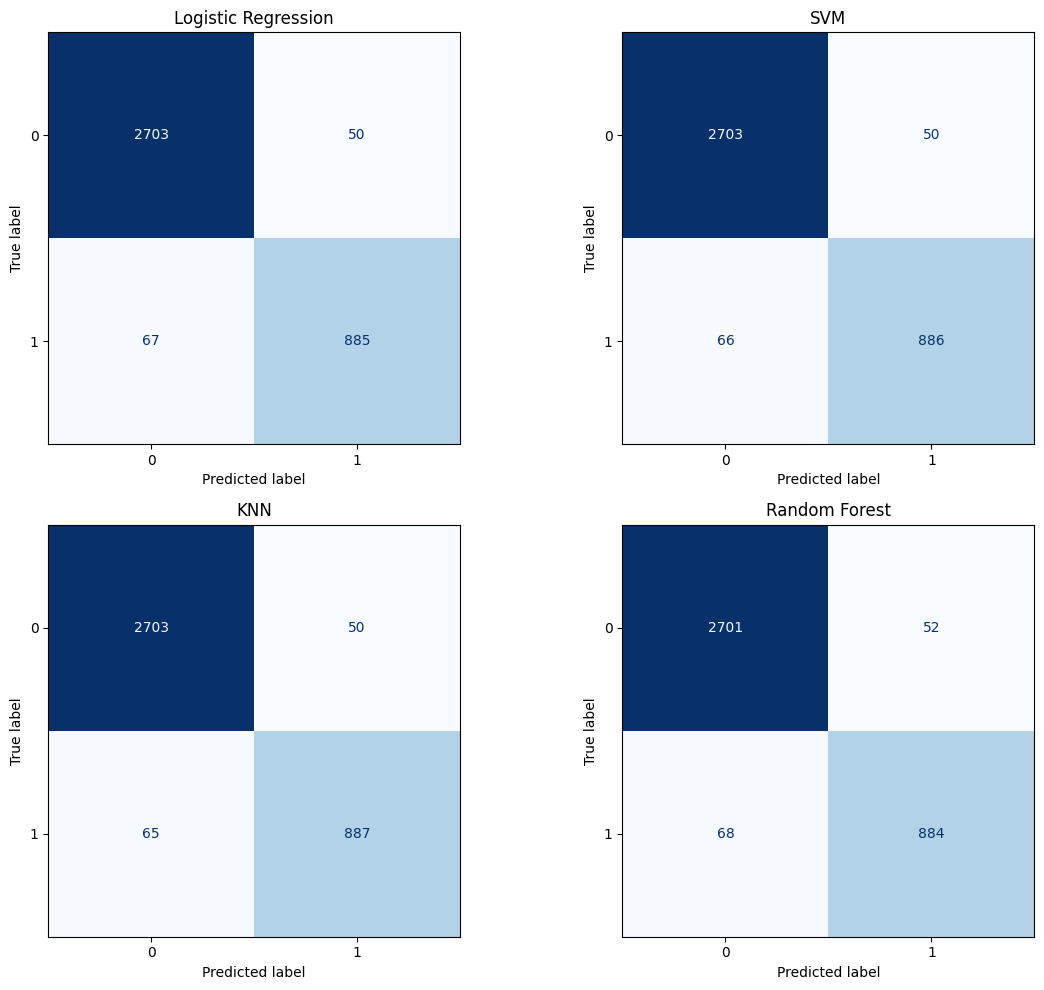

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = pipe.score(X_test, y_test)
    
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], colorbar=False, cmap='Blues')
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()

Parametri migliori:  {'knn__algorithm': 'auto', 'knn__leaf_size': 1, 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}
Accuracy:  0.9686909581646423
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.95      0.93      0.94       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705



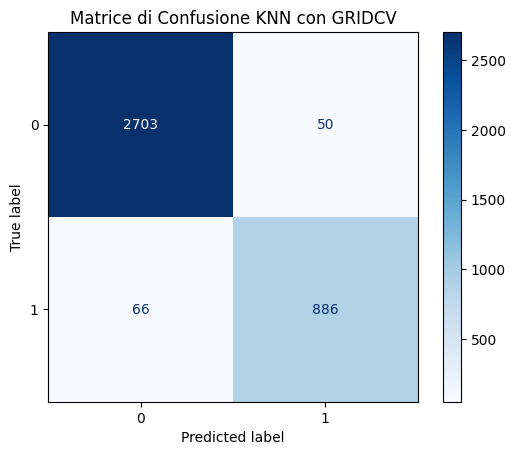

In [16]:
param_grid = {
    'knn__n_neighbors': [10, 20, 30, 50],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [1, 2, 5, 10]
}

pipe_knn = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

grid = GridSearchCV(pipe_knn, param_grid=param_grid, cv=5, n_jobs=-1) # provato anche con cv = 10 accuracy non cambia, cambia solo n_neighbors che va a 30
grid.fit(X_train, y_train)
print("Parametri migliori: ", grid.best_params_)
print("Accuracy: ", grid.score(X_test, y_test))
best_model = grid.best_estimator_
y_pred_rf = best_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title("Matrice di Confusione KNN con GRIDCV")
plt.show()

In [17]:
test_pred = pre_process(test)
test_pred

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,3.00000,7.0,4.0,6.0,5.028958,1.0,0.0,1.0,0.0
1,3.11687,0.0,0.0,5.0,1.000000,0.0,1.0,0.0,1.0
2,3.00000,5.0,6.0,15.0,9.000000,1.0,0.0,1.0,0.0
3,3.00000,4.0,4.0,5.0,6.000000,1.0,0.0,1.0,0.0
4,9.00000,1.0,2.0,1.0,1.000000,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
6170,3.00000,5.0,5.0,9.0,6.000000,1.0,0.0,1.0,0.0
6171,8.00000,2.0,1.0,0.0,0.000000,0.0,1.0,0.0,1.0
6172,2.00000,4.0,3.0,9.0,7.000000,1.0,0.0,1.0,0.0
6173,3.00000,4.0,4.0,11.0,9.000000,1.0,0.0,1.0,0.0


In [18]:
test_pred.isnull().sum()

Time_spent_Alone                 0
Social_event_attendance          0
Going_outside                    0
Friends_circle_size              0
Post_frequency                   0
Stage_fear_No                    0
Stage_fear_Yes                   0
Drained_after_socializing_No     0
Drained_after_socializing_Yes    0
dtype: int64

In [19]:
y_pred_final = best_model.predict(test_pred)
y_pred_final

array([0, 1, 0, ..., 0, 0, 1], shape=(6175,))

In [ ]:
labels = np.array(['Extrovert', 'Introvert'])
y_pred_final = labels[y_pred_final]

In [21]:
response = pd.DataFrame({'id': test['id'],
                         'Personality' : y_pred_final})
response.to_csv("Responso.csv", index=False)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13699
           1       0.94      0.94      0.94      4825

    accuracy                           0.97     18524
   macro avg       0.96      0.96      0.96     18524
weighted avg       0.97      0.97      0.97     18524



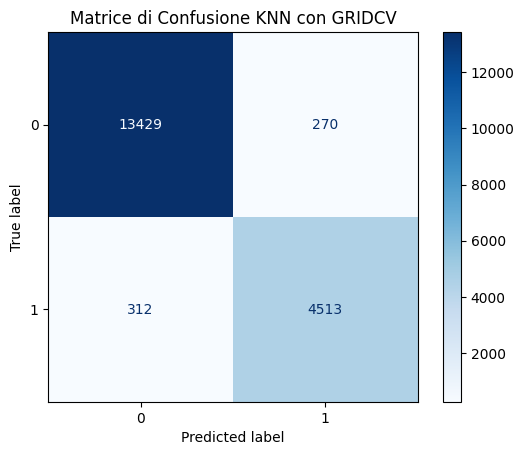

In [22]:

model_final = best_model.fit(X, y)
y_pred_rf = model_final.predict(X)
print(classification_report(y, y_pred_rf))
cm_rf = confusion_matrix(y, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title("Matrice di Confusione KNN con GRIDCV")
plt.show()

In [23]:
y_pred_final_train = model_final.predict(test_pred)
y_pred_final_train

array([0, 1, 0, ..., 0, 0, 1], shape=(6175,))

In [ ]:
labels = np.array(['Extrovert', 'Introvert'])
y_pred_final_train = labels[y_pred_final_train]

In [25]:
response = pd.DataFrame({'id': test['id'],
                         'Personality' : y_pred_final_train})
response.to_csv("Responso_ConTuttoIlTrain.csv", index=False)

In [26]:
train_2 = pd.read_csv("personality_datasert.csv")

In [27]:
train_2.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [28]:
data_2 = pre_process(train_2)
data_2

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,Extrovert,1.0,0.0,1.0,0.0
1,9.0,0.0,0.0,0.0,3.0,Introvert,0.0,1.0,0.0,1.0
2,9.0,1.0,2.0,5.0,2.0,Introvert,0.0,1.0,0.0,1.0
3,0.0,6.0,7.0,14.0,8.0,Extrovert,1.0,0.0,1.0,0.0
4,3.0,9.0,4.0,8.0,5.0,Extrovert,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,Extrovert,1.0,0.0,1.0,0.0
2896,3.0,8.0,3.0,14.0,9.0,Extrovert,1.0,0.0,1.0,0.0
2897,4.0,1.0,1.0,4.0,0.0,Introvert,0.0,1.0,0.0,1.0
2898,11.0,1.0,3.0,2.0,0.0,Introvert,0.0,1.0,0.0,1.0


In [29]:
lab = LabelEncoder()
data_2['Personality'] = lab.fit_transform(data_2['Personality'])  # 1 per extro, 0 per intro
data_2

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,0,1.0,0.0,1.0,0.0
1,9.0,0.0,0.0,0.0,3.0,1,0.0,1.0,0.0,1.0
2,9.0,1.0,2.0,5.0,2.0,1,0.0,1.0,0.0,1.0
3,0.0,6.0,7.0,14.0,8.0,0,1.0,0.0,1.0,0.0
4,3.0,9.0,4.0,8.0,5.0,0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2895,3.0,7.0,6.0,6.0,6.0,0,1.0,0.0,1.0,0.0
2896,3.0,8.0,3.0,14.0,9.0,0,1.0,0.0,1.0,0.0
2897,4.0,1.0,1.0,4.0,0.0,1,0.0,1.0,0.0,1.0
2898,11.0,1.0,3.0,2.0,0.0,1,0.0,1.0,0.0,1.0


In [30]:
X_2 = data_2.drop('Personality', axis = 1)
y_2 = data_2['Personality']
X_2, y_2

(      Time_spent_Alone  Social_event_attendance  Going_outside  \
 0                  4.0                      4.0            6.0   
 1                  9.0                      0.0            0.0   
 2                  9.0                      1.0            2.0   
 3                  0.0                      6.0            7.0   
 4                  3.0                      9.0            4.0   
 ...                ...                      ...            ...   
 2895               3.0                      7.0            6.0   
 2896               3.0                      8.0            3.0   
 2897               4.0                      1.0            1.0   
 2898              11.0                      1.0            3.0   
 2899               3.0                      6.0            6.0   
 
       Friends_circle_size  Post_frequency  Stage_fear_No  Stage_fear_Yes  \
 0                    13.0             5.0            1.0             0.0   
 1                     0.0             3

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1491
           1       0.92      0.94      0.93      1409

    accuracy                           0.93      2900
   macro avg       0.93      0.93      0.93      2900
weighted avg       0.93      0.93      0.93      2900



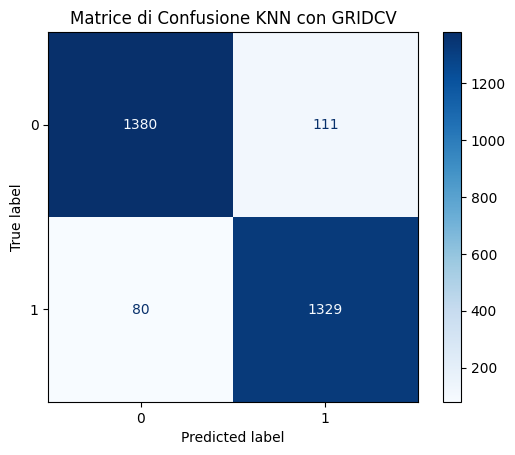

In [31]:
model_final_2 = best_model.fit(X_2, y_2)
y_pred_rf = model_final_2.predict(X_2)
print(classification_report(y_2, y_pred_rf))
cm_rf = confusion_matrix(y_2, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap='Blues')
plt.title("Matrice di Confusione KNN con GRIDCV")
plt.show()

In [32]:
y_pred_final_train_2 = model_final_2.predict(test_pred)
y_pred_final_train_2

array([0, 1, 0, ..., 0, 0, 1], shape=(6175,))

In [ ]:
labels = np.array(['Extrovert', 'Introvert'])
y_pred_final_train_2 = labels[y_pred_final_train_2]

In [34]:
response = pd.DataFrame({'id': test['id'],
                         'Personality' : y_pred_final_train_2})
response.to_csv("Responso_ConIlDatasetNuovo.csv", index=False)